In [1]:
from SquareBoard import Board
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc
import copy


In [2]:


class Path:
    def __init__(self):
        self.fragments = [] #stores all path fragments
        
    def add_segment(self, segment_real):
        
        segment = copy.deepcopy(segment_real)
        connected_seg_inds = [] #stores the indices of the segments extended
        
        for a,path in enumerate(self.fragments):
            
            for i in (0,1):
                if np.all(path[0] == segment[i]):
   
                    path.insert(0, segment[i - 1])
                    connected_seg_inds.append(a)
            
                elif np.all(path[-1] == segment[i]):
                    path.append(segment[i - 1])
                    connected_seg_inds.append(a)
                    
        #print(connected_seg_inds)          
                    
        if len(connected_seg_inds) == 0:
            self.fragments.append(segment)
        
        elif len(connected_seg_inds) == 2:
            if np.all(self.fragments[connected_seg_inds[0]][-2] == self.fragments[connected_seg_inds[1]][0]):
                new_fragment = self.fragments[connected_seg_inds[0]][:-1] + self.fragments[connected_seg_inds[1]]
           
            elif np.all(self.fragments[connected_seg_inds[0]][0] == self.fragments[connected_seg_inds[0]][-2]):
                new_fragment = self.fragments[connected_seg_inds[1]][:-1] + self.fragments[connected_seg_inds[0]]
            
            #account for possibility path fragments are in opposing directions
            elif np.all(self.fragments[connected_seg_inds[0]][0] == self.fragments[connected_seg_inds[1]][0]):
                self.fragments[connected_seg_inds[0]].reverse()
                new_fragment = self.fragments[connected_seg_inds[0]][:-1] + self.fragments[connected_seg_inds[1]]
           
            elif np.all(self.fragments[connected_seg_inds[0]][-1] == self.fragments[connected_seg_inds[0]][-1]):
                self.fragments[connected_seg_inds[1]].reverse()

                new_fragment = self.fragments[connected_seg_inds[0]][:-1] + self.fragments[connected_seg_inds[1]]
                
                
            else:
                print("something messed up. this else shouldn't be called")
                new_fragment = self.fragments[connected_seg_inds[1]][:-1] + self.fragments[connected_seg_inds[0]]
                
            self.fragments[connected_seg_inds[0]] = new_fragment

            self.fragments.pop(connected_seg_inds[1])
        elif len(connected_seg_inds) >= 3:
            print("too many connected seg inds")
                
    def num_fragments(self):
        return len(self.fragments)
    
    def __str__(self):
        retString = ''
        for i in self.fragments:
            retString += str(i) + "\n\n"
            
        return retString

In [3]:
n = 50

B = Board(n, 1)


In [4]:

tree_segments = []
gem_tree_segments = []
peano_curve_segments = []
for i in range(n):
    for j in range(n):
        move = B.move_array[i,j]
            
        place = np.array([i,j])

        if i != 0 or j!= 0:

            tree_segments.append([place, move])

            move_is_horiz = (move[0] == i)
            if move_is_horiz:
                shift = np.array([-0.5,0.5])
            else:
                shift = -np.array([-0.5,0.5])

            if i != 0 and j != 0:
                gem_tree_segments.append([move + shift, place + shift])    

for i in range(n-1):
    gem_tree_segments.append([(0.5 + i, n - 0.5), (i+1.5, n-0.5)])
    gem_tree_segments.append([(n - 0.5, 0.5 + i), (n-0.5, i+1.5)]) 

for line in np.array(tree_segments):
    is_horiz = line[1,0] - line[0,0] == 0 
    
    if is_horiz:
        
        x = line[0] + np.array((-0.25,-0.25))
        y = line[1] + np.array((-0.25,0.25))
        
        if np.all(x >= 0):
            peano_curve_segments.append([x,y])
            
        x = line[0] + np.array((0.25,-0.25))
        y = line[1] + np.array((0.25,0.25))
        
        if np.all(x < n-0.5):
            peano_curve_segments.append([y,x])
            
                
    else:
        x = line[0] + np.array((-0.25,-0.25))
        y = line[1] + np.array((0.25,-0.25))
        
        if np.all(y >= 0):
            peano_curve_segments.append([y,x])

            
        x = line[0] + np.array((-0.25,0.25))
        y = line[1] + np.array((0.25,0.25))
        
        if np.all(y < n-0.5):
            peano_curve_segments.append([x,y])    
            
for line in np.array(gem_tree_segments):
    is_horiz = line[1,0] - line[0,0] == 0 
    
    if is_horiz:
                
        x = line[0] + np.array((-0.25,0.25))
        y = line[1] + np.array((-0.25,-0.25))
        
        if np.all(x >= 0):
            peano_curve_segments.append([y,x])
            
        x = line[0] + np.array((0.25,0.25))
        y = line[1] + np.array((0.25,-0.25))
        
        if np.all(x < n-0.5):
            peano_curve_segments.append([x,y])
            
                
    else:
        x = line[0] + np.array((0.25,-0.25))
        y = line[1] + np.array((-0.25,-0.25))
        
        if np.all(y >= 0):
            peano_curve_segments.append([x,y])
            
        x = line[0] + np.array((0.25,0.25))
        y = line[1] + np.array((-0.25,0.25))
        
        if np.all(y < n-0.5):
            peano_curve_segments.append([y,x])


In [5]:
peano_path = Path()

for segment in copy.deepcopy(peano_curve_segments):
    peano_path.add_segment(segment)
#     print(peano_path)
#     print()

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[0]
[0]
[]
[1, 1]
[1]
[1]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[10, 10]
[10]
[10, 10]
[10]
[10]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[46]
[46]
[]
[]
[47]
[47]
[]
[]
[]
[]
[]
[]
[]
[55, 55]
[56]
[56, 56]
[57]
[57]
[]
[]
[]
[]
[]
[]
[]
[]
[62]
[62]
[]
[]
[]
[66, 66]
[67]
[67, 67]
[68]
[68, 68]
[69]
[69]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[93, 93]
[94]
[94]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[129]
[129]
[]
[]
[]
[]
[]
[]
[]
[135, 135]
[136]
[136]
[]
[]
[]
[]
[]
[]
[]
[139, 139]
[140]
[140]
[]
[]
[]
[]
[144]
[144]
[]
[]
[]
[]
[]
[]
[]
[]
[147]
[147, 147]
[1

[]
[]
[]
[]
[]
[1438]
[]
[]
[]
[]
[1379]
[1379]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1388]
[1388]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1394, 1394]
[1395]
[1395]
[]
[1397, 1397]
[]
[]
[]
[]
[1400]
[1400]
[]
[]
[]
[]
[1404]
[1404]
[]
[1406, 1406]
[1407]
[1407]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1415, 1415]
[1416]
[1416]
[]
[]
[]
[]
[1419]
[1419]
[]
[1421, 1421]
[1422]
[1422]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1434]
[1434]
[]
[]
[]
[]
[1438]
[1438]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1522]
[]
[]
[1452]
[1452]
[]
[]
[]
[]
[]
[1458, 1458]
[1459]
[1459]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1465]
[1465]
[]
[]
[]
[]
[1469]
[1469]
[]
[]
[1470]
[1470]
[]
[]
[]
[]
[]
[1476, 1476]
[1477]
[1477]
[]
[]
[]
[]
[]
[1483, 1483]
[1484]
[1484]
[]
[1486, 1486]
[1487]
[1487]
[]
[]
[1488]
[1488]
[]
[]
[]
[]
[1492]
[1492]
[]
[]
[1493]
[1493]
[]
[]
[]
[1497, 1497]
[1498]
[1498, 1498]
[1499]
[1499]
[]
[]
[]
[1502]
[1502]
[]
[]
[]
[]
[1506]
[1506]
[]
[]
[]
[1510, 1510]
[1511]
[1511]
[]
[]
[]
[]


[]
[]
[]
[]
[2444]
[2444]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2456]
[2456]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2463]
[2463]
[]
[]
[]
[]
[2467]
[2467]
[]
[]
[]
[]
[]
[2541]
[]
[]
[]
[]
[]
[2473, 2473]
[2474]
[2474]
[]
[2476, 2476]
[2477]
[2477, 2477]
[2478]
[2478]
[]
[]
[]
[]
[]
[]
[2484]
[2484]
[]
[]
[2486]
[2486]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2497]
[2497]
[]
[]
[2499]
[2499, 2499]
[2500]
[2500, 2500]
[2501]
[2501]
[]
[]
[]
[]
[2502]
[2502]
[]
[]
[2503]
[2503]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2528]
[2528]
[]
[]
[]
[]
[2532]
[2532]
[]
[]
[]
[]
[2537]
[2537]
[]
[2539, 2539]
[2540]
[2540]
[]
[]
[2541]
[2541]
[]
[]
[]
[2610]
[]
[]
[]
[]
[]
[]
[]
[]
[2548]
[2548]
[]
[]
[]
[2550, 2550]
[2551]
[2551]
[]
[]
[]
[]
[]
[]
[]
[]
[2559]
[2559, 2559]
[]
[2628]
[]
[]
[]
[]
[2560]
[2560]
[]
[]
[]
[]
[2564]
[2564]
[]
[]
[]
[]
[]
[2568, 2568]
[2569]
[2569, 2569]
[2570]
[2570, 2570]
[2571]
[2571]
[]
[]
[]
[2575, 2575]
[2576]
[2576, 2576]
[2577]
[2577, 2577

[37, 38, 38]
too many connected seg inds
[111, 111, 113]
too many connected seg inds
[38, 39, 39]
too many connected seg inds
[113, 113, 115]
too many connected seg inds
[39, 40, 40]
too many connected seg inds
[115, 115, 117]
too many connected seg inds
[40, 41, 41]
too many connected seg inds
[117, 117, 119]
too many connected seg inds
[41, 42, 42]
too many connected seg inds
[119, 119, 121]
too many connected seg inds
[42, 43, 43]
too many connected seg inds
[121, 121, 123]
too many connected seg inds
[43, 44, 44]
too many connected seg inds
[123, 123, 125]
too many connected seg inds
[44]
[125, 125]
[45, 3182, 3182]
too many connected seg inds
[45, 45]
[]
[]
[45, 47, 47]
too many connected seg inds
[45, 45, 127]
too many connected seg inds
[47, 49, 49]
too many connected seg inds
[127, 127, 129]
too many connected seg inds
[49, 51, 51]
too many connected seg inds
[129, 129, 130]
too many connected seg inds
[51]
[130, 130]
[]
[]
[]
[]
[55, 57, 57]
too many connected seg inds
[55, 55

[273, 273, 275]
too many connected seg inds
[208, 209, 209]
too many connected seg inds
[275, 275, 277]
too many connected seg inds
[209, 3178, 3178]
too many connected seg inds
[277, 277, 279]
too many connected seg inds
[3179]
[279, 279, 281]
too many connected seg inds
[3180, 3181, 3181]
too many connected seg inds
[281, 281]
[]
[]
[210]
[210, 210]
[]
[]
[211, 3180, 3180]
too many connected seg inds
[211, 211]
[]
[351, 351]
[351]
[]
[212, 214, 214]
too many connected seg inds
[212, 212, 283]
too many connected seg inds
[214]
[283, 283]
[]
[356, 356]
[217]
[217, 217]
[]
[]
[219, 221, 221]
too many connected seg inds
[219, 219, 285]
too many connected seg inds
[221, 223, 223]
too many connected seg inds
[285, 285, 287]
too many connected seg inds
[223, 225, 225]
too many connected seg inds
[287, 287, 289]
too many connected seg inds
[225, 227, 227]
too many connected seg inds
[289, 289, 291]
too many connected seg inds
[227, 229, 229]
too many connected seg inds
[291, 291, 293]
too ma

[]
[369, 371, 371]
too many connected seg inds
[369, 369, 434]
too many connected seg inds
[371, 373, 373]
too many connected seg inds
[434, 434, 436]
too many connected seg inds
[373, 374, 374]
too many connected seg inds
[436, 436, 438]
too many connected seg inds
[374, 3179, 3179]
too many connected seg inds
[438, 438, 439]
too many connected seg inds
[375, 375, 3180]
too many connected seg inds
[439, 439, 441]
too many connected seg inds
[375, 3181, 3181]
too many connected seg inds
[441, 441, 443]
too many connected seg inds
[376, 376, 3182]
too many connected seg inds
[443, 443, 445]
too many connected seg inds
[376, 378, 378]
too many connected seg inds
[445, 445, 447]
too many connected seg inds
[378, 379, 379]
too many connected seg inds
[447, 447, 448]
too many connected seg inds
[379]
[448, 448]
[449, 449, 511]
too many connected seg inds
[512, 512]
[381]
[381, 381]
[]
[512, 512]
[383]
[383, 383]
[]
[]
[385]
[385, 385]
[]
[515, 515]
[387, 389, 389]
too many connected seg ind

[521, 523, 523]
too many connected seg inds
[580, 580, 582]
too many connected seg inds
[523, 525, 525]
too many connected seg inds
[582, 582, 583]
too many connected seg inds
[525, 527, 527]
too many connected seg inds
[583, 583, 585]
too many connected seg inds
[527, 529, 529]
too many connected seg inds
[585, 585, 587]
too many connected seg inds
[529, 531, 531]
too many connected seg inds
[587, 587, 589]
too many connected seg inds
[531, 533, 533]
too many connected seg inds
[589, 589, 591]
too many connected seg inds
[533, 535, 535]
too many connected seg inds
[591, 591, 592]
too many connected seg inds
[535, 537, 537]
too many connected seg inds
[592, 592, 594]
too many connected seg inds
[537, 538, 538]
too many connected seg inds
[594, 594, 596]
too many connected seg inds
[538, 3175, 3175]
too many connected seg inds
[596, 596, 597]
too many connected seg inds
[539, 539, 3176]
too many connected seg inds
[597, 597, 598]
too many connected seg inds
[539, 541, 541]
too many conn

[3187, 3188, 3188]
too many connected seg inds
[729, 729]
[]
[787, 787]
[668, 669, 669]
too many connected seg inds
[668, 668, 730]
too many connected seg inds
[669, 3187, 3187]
too many connected seg inds
[730, 730, 731]
too many connected seg inds
[670, 670, 3188]
too many connected seg inds
[731, 731, 732]
too many connected seg inds
[670, 3189, 3189]
too many connected seg inds
[732, 732, 733]
too many connected seg inds
[3190, 3191, 3191]
too many connected seg inds
[733, 733]
[786]
[787, 787]
[671, 673, 673]
too many connected seg inds
[671, 671, 734]
too many connected seg inds
[673]
[734, 734]
[]
[789, 789]
[676, 678, 678]
too many connected seg inds
[676, 676, 736]
too many connected seg inds
[678, 680, 680]
too many connected seg inds
[736, 736, 738]
too many connected seg inds
[680]
[738, 738]
[]
[]
[]
[795, 795]
[684, 686, 686]
too many connected seg inds
[684, 684, 739]
too many connected seg inds
[686, 688, 688]
too many connected seg inds
[739, 739, 740]
too many connect

[811, 811, 869]
too many connected seg inds
[812, 812, 3193]
too many connected seg inds
[869, 869, 871]
too many connected seg inds
[812, 3194, 3194]
too many connected seg inds
[871, 871, 873]
too many connected seg inds
[813, 813, 3195]
too many connected seg inds
[873, 873, 875]
too many connected seg inds
[813, 814, 814]
too many connected seg inds
[875, 875, 877]
too many connected seg inds
[814, 3196, 3196]
too many connected seg inds
[877, 877]
[]
[943, 943]
[943]
[944, 944]
[816, 3194, 3194]
too many connected seg inds
[816, 816]
[]
[]
[817, 818, 818]
too many connected seg inds
[817, 817, 879]
too many connected seg inds
[818, 3194, 3194]
too many connected seg inds
[879, 879]
[]
[949, 949]
[819]
[819, 819]
[]
[]
[880, 880]
[948, 948]
[819, 821, 821]
too many connected seg inds
[819, 819, 881]
too many connected seg inds
[821, 823, 823]
too many connected seg inds
[881, 881, 883]
too many connected seg inds
[823, 825, 825]
too many connected seg inds
[883, 883, 885]
too many 

[961, 963, 963]
too many connected seg inds
[1008, 1008, 1010]
too many connected seg inds
[963, 965, 965]
too many connected seg inds
[1010, 1010, 1011]
too many connected seg inds
[965, 967, 967]
too many connected seg inds
[1011, 1011, 1013]
too many connected seg inds
[967, 969, 969]
too many connected seg inds
[1013, 1013, 1015]
too many connected seg inds
[969, 971, 971]
too many connected seg inds
[1015, 1015, 1017]
too many connected seg inds
[971, 973, 973]
too many connected seg inds
[1017, 1017, 1019]
too many connected seg inds
[973, 974, 974]
too many connected seg inds
[1019, 1019, 1021]
too many connected seg inds
[974]
[1021, 1021]
[1022, 1022, 1082]
too many connected seg inds
[1083, 1083]
[1023, 1023, 1083]
too many connected seg inds
[1084, 1084]
[1024, 1024, 1084]
too many connected seg inds
[1085, 1085]
[1085]
[]
[977, 3173, 3173]
too many connected seg inds
[977, 977, 1026]
too many connected seg inds
[978, 978, 3174]
too many connected seg inds
[1026, 1026, 1027]

[1092, 1094, 1094]
too many connected seg inds
[1141, 1141, 1143]
too many connected seg inds
[1094]
[1143, 1143]
[]
[]
[]
[]
[]
[]
[]
[]
[1100]
[1100, 1100]
[]
[]
[1101, 3160, 3160]
too many connected seg inds
[1101, 1101]
[]
[]
[1101, 1103, 1103]
too many connected seg inds
[1101, 1101, 1144]
too many connected seg inds
[1103, 1105, 1105]
too many connected seg inds
[1144, 1144, 1146]
too many connected seg inds
[1105]
[1146, 1146]
[]
[1211, 1211]
[1108, 1110, 1110]
too many connected seg inds
[1108, 1108, 1148]
too many connected seg inds
[1110, 1112, 1112]
too many connected seg inds
[1148, 1148, 1149]
too many connected seg inds
[1112, 1114, 1114]
too many connected seg inds
[1149, 1149, 1151]
too many connected seg inds
[1114, 1116, 1116]
too many connected seg inds
[1151, 1151, 1153]
too many connected seg inds
[1116, 1117, 1117]
too many connected seg inds
[1153, 1153, 1155]
too many connected seg inds
[1117, 3158, 3158]
too many connected seg inds
[1155, 1155, 1157]
too many c

[1225, 1225]
[]
[]
[1226, 3134, 3134]
too many connected seg inds
[1226, 1226, 1257]
too many connected seg inds
[1227, 1227, 3135]
too many connected seg inds
[1257, 1257, 1259]
too many connected seg inds
[1227, 3136, 3136]
too many connected seg inds
[1259, 1259, 1260]
too many connected seg inds
[1228, 1228, 3137]
too many connected seg inds
[1260, 1260, 1262]
too many connected seg inds
[1228, 3138, 3138]
too many connected seg inds
[1262, 1262]
[]
[]
[1229, 1230, 1230]
too many connected seg inds
[1229, 1229, 1264]
too many connected seg inds
[1230, 3138, 3138]
too many connected seg inds
[1264, 1264]
[]
[]
[1231, 3138, 3138]
too many connected seg inds
[1231, 1231]
[]
[]
[1231, 1232, 1232]
too many connected seg inds
[1231, 1231, 1266]
too many connected seg inds
[1232, 3138, 3138]
too many connected seg inds
[1266, 1266]
[]
[]
[1267, 1267]
[]
[]
[]
[]
[1316, 1316]
[1233, 3136, 3136]
too many connected seg inds
[1233, 1233]
[]
[1317, 1317]
[1268, 1268, 1317]
too many connected s

[1359, 1359, 1361]
too many connected seg inds
[3134, 3135, 3135]
too many connected seg inds
[1361, 1361, 1362]
too many connected seg inds
[3136, 3137, 3137]
too many connected seg inds
[1362, 1362, 1363]
too many connected seg inds
[3138, 3139, 3139]
too many connected seg inds
[1363, 1363, 1365]
too many connected seg inds
[3140, 3141, 3141]
too many connected seg inds
[1365, 1365, 1366]
too many connected seg inds
[1327, 1327, 3142]
too many connected seg inds
[1366, 1366, 1368]
too many connected seg inds
[1327, 1328, 1328]
too many connected seg inds
[1368, 1368, 1370]
too many connected seg inds
[1328, 3143, 3143]
too many connected seg inds
[1370, 1370, 1371]
too many connected seg inds
[1329, 1329, 3144]
too many connected seg inds
[1371, 1371, 1373]
too many connected seg inds
[1329, 1330, 1330]
too many connected seg inds
[1373, 1373, 1375]
too many connected seg inds
[1330]
[1375, 1375]
[1331]
[1331, 1331]
[]
[1424, 1424]
[1376, 1376, 1424]
too many connected seg inds
[142

[1433, 1433, 1467]
too many connected seg inds
[1435, 1436, 1436]
too many connected seg inds
[1467, 1467, 1469]
too many connected seg inds
[1436, 3115, 3115]
too many connected seg inds
[1469, 1469, 1471]
too many connected seg inds
[3116, 3117, 3117]
too many connected seg inds
[1471, 1471]
[]
[]
[1437, 1438, 1438]
too many connected seg inds
[1437, 1437, 1473]
too many connected seg inds
[1438]
[1473, 1473]
[1527]
[1528, 1528]
[1440, 1442, 1442]
too many connected seg inds
[1440, 1440, 1475]
too many connected seg inds
[1442, 1443, 1443]
too many connected seg inds
[1475, 1475, 1477]
too many connected seg inds
[1443, 3115, 3115]
too many connected seg inds
[1477, 1477]
[]
[1531, 1531]
[1444, 1445, 1445]
too many connected seg inds
[1444, 1444, 1478]
too many connected seg inds
[1445, 3114, 3114]
too many connected seg inds
[1478, 1478]
[]
[]
[1446]
[1446, 1446]
[]
[1534, 1534]
[1479, 1479, 1534]
too many connected seg inds
[1535, 1535]
[1446, 1447, 1447]
too many connected seg ind

[1536, 3101, 3101]
too many connected seg inds
[1577, 1577, 1579]
too many connected seg inds
[3102, 3103, 3103]
too many connected seg inds
[1579, 1579]
[]
[]
[1580, 1580]
[1633, 1633]
[1537, 1539, 1539]
too many connected seg inds
[1537, 1537, 1581]
too many connected seg inds
[1539]
[1581, 1581]
[]
[]
[1542, 1543, 1543]
too many connected seg inds
[1542, 1542, 1583]
too many connected seg inds
[1543]
[1583, 1583]
[1584, 1584, 1640]
too many connected seg inds
[1641, 1641]
[1545, 3098, 3098]
too many connected seg inds
[1545, 1545]
[]
[1641, 1641]
[1545, 3097, 3097]
too many connected seg inds
[1545, 1545, 1586]
too many connected seg inds
[3098]
[1586, 1586]
[]
[1642, 1642]
[1546]
[1546, 1546]
[]
[]
[1548]
[1548, 1548]
[]
[1645, 1645]
[1587, 1587, 1645]
too many connected seg inds
[1646, 1646]
[1588, 1588, 1646]
too many connected seg inds
[]
[1589, 1589]
[1647, 1647]
[1647]
[1648, 1648]
[1549, 1551, 1551]
too many connected seg inds
[1549, 1549, 1590]
too many connected seg inds
[1

[1696, 1696, 1697]
too many connected seg inds
[1662, 1664, 1664]
too many connected seg inds
[1697, 1697, 1699]
too many connected seg inds
[1664, 1665, 1665]
too many connected seg inds
[1699, 1699, 1701]
too many connected seg inds
[1665, 3074, 3074]
too many connected seg inds
[1701, 1701]
[]
[1749, 1749]
[1666]
[1666, 1666]
[]
[1749, 1749]
[1749]
[1750, 1750]
[1750]
[1751, 1751]
[1669]
[1669, 1669]
[1702, 1702, 1750]
too many connected seg inds
[]
[]
[1752, 1752]
[1703, 1703, 1752]
too many connected seg inds
[1753, 1753]
[1670, 3066, 3066]
too many connected seg inds
[1670, 1670, 1705]
too many connected seg inds
[3067]
[1705, 1705]
[1753]
[1754, 1754]
[1671, 1673, 1673]
too many connected seg inds
[1671, 1671, 1706]
too many connected seg inds
[1673, 1675, 1675]
too many connected seg inds
[1706, 1706, 1708]
too many connected seg inds
[1675]
[1708, 1708]
[]
[]
[1676, 1676, 3065]
too many connected seg inds
[1709, 1709, 1711]
too many connected seg inds
[1676, 3066, 3066]
too ma

[]
[1813, 1813]
[]
[1771, 3044, 3044]
too many connected seg inds
[1771, 1771]
[]
[1863, 1863]
[1814, 1814, 1863]
too many connected seg inds
[1864, 1864]
[1772, 1773, 1773]
too many connected seg inds
[1772, 1772, 1816]
too many connected seg inds
[1773, 3042, 3042]
too many connected seg inds
[1816, 1816]
[]
[1865, 1865]
[3041, 3042, 3042]
too many connected seg inds
[1817, 1817, 1819]
too many connected seg inds
[1774, 1774, 3043]
too many connected seg inds
[1819, 1819, 1820]
too many connected seg inds
[1774]
[1820, 1820]
[]
[1866, 1866]
[1777]
[1777, 1777]
[]
[1866, 1866]
[1866]
[]
[1779, 3040, 3040]
too many connected seg inds
[1779, 1779]
[]
[1869, 1869]
[1821, 1821, 1869]
too many connected seg inds
[1870, 1870]
[1822, 1822, 1870]
too many connected seg inds
[1871, 1871]
[1781, 3037, 3037]
too many connected seg inds
[1781, 1781]
[]
[]
[1781, 1783, 1783]
too many connected seg inds
[1781, 1781, 1823]
too many connected seg inds
[1783, 1785, 1785]
too many connected seg inds
[1

[1964, 1964]
[1919, 1919, 1964]
too many connected seg inds
[1965, 1965]
[1920, 1920, 1965]
too many connected seg inds
[1966, 1966]
[1879, 3033, 3033]
too many connected seg inds
[1879, 1879]
[]
[1965, 1965]
[1879]
[1879, 1879]
[]
[]
[]
[1967, 1967]
[1882, 1883, 1883]
too many connected seg inds
[1882, 1882, 1922]
too many connected seg inds
[1883, 3030, 3030]
too many connected seg inds
[1922, 1922, 1923]
too many connected seg inds
[1884, 1884, 3031]
too many connected seg inds
[1923, 1923, 1925]
too many connected seg inds
[1884, 1885, 1885]
too many connected seg inds
[1925, 1925, 1927]
too many connected seg inds
[1885, 3032, 3032]
too many connected seg inds
[1927, 1927]
[]
[]
[1928, 1928]
[]
[1928, 1928]
[1973, 1973]
[1928, 1928, 1973]
too many connected seg inds
[1974, 1974]
[1974]
[]
[1929, 1929]
[]
[1929, 1929]
[1975, 1975]
[1888, 1890, 1890]
too many connected seg inds
[1888, 1888, 1929]
too many connected seg inds
[1890]
[1929, 1929]
[]
[1974, 1974]
[1893, 1895, 1895]
too 

[2012, 2012, 2014]
too many connected seg inds
[1982, 2985, 2985]
too many connected seg inds
[2014, 2014, 2015]
too many connected seg inds
[1983, 1983, 2986]
too many connected seg inds
[2015, 2015, 2016]
too many connected seg inds
[1983, 2987, 2987]
too many connected seg inds
[2016, 2016, 2017]
too many connected seg inds
[2988]
[2017, 2017]
[]
[2060, 2060]
[1984, 2987, 2987]
too many connected seg inds
[1984, 1984]
[]
[]
[]
[2062, 2062]
[1985]
[1985, 1985]
[]
[2062, 2062]
[2062]
[]
[]
[]
[]
[2065, 2065]
[1990, 1991, 1991]
too many connected seg inds
[1990, 1990, 2019]
too many connected seg inds
[1991, 2983, 2983]
too many connected seg inds
[2019, 2019, 2021]
too many connected seg inds
[2984]
[2021, 2021, 2023]
too many connected seg inds
[2985]
[2023, 2023, 2024]
too many connected seg inds
[1992, 1992, 2986]
too many connected seg inds
[2024, 2024, 2026]
too many connected seg inds
[1992]
[2026, 2026]
[]
[]
[1993, 2986, 2986]
too many connected seg inds
[1993, 1993]
[]
[]
[20

[2090, 2090, 2132]
too many connected seg inds
[2092, 2093, 2093]
too many connected seg inds
[2132, 2132, 2134]
too many connected seg inds
[2093, 2976, 2976]
too many connected seg inds
[2134, 2134]
[]
[]
[2094, 2976, 2976]
too many connected seg inds
[2094, 2094]
[]
[2194, 2194]
[2094, 2096, 2096]
too many connected seg inds
[2094, 2094, 2135]
too many connected seg inds
[2096]
[2135, 2135]
[]
[2194, 2194]
[2099, 2101, 2101]
too many connected seg inds
[2099, 2099, 2137]
too many connected seg inds
[2101, 2103, 2103]
too many connected seg inds
[2137, 2137, 2139]
too many connected seg inds
[2103, 2104, 2104]
too many connected seg inds
[2139, 2139, 2141]
too many connected seg inds
[2104]
[2141, 2141]
[2105, 2106, 2106]
too many connected seg inds
[2105, 2105, 2143]
too many connected seg inds
[2106, 2972, 2972]
too many connected seg inds
[2143, 2143]
[]
[]
[2144, 2144]
[]
[2144, 2144]
[]
[2144, 2144]
[]
[2109, 2110, 2110]
too many connected seg inds
[2109, 2109, 2145]
too many co

In [6]:
def show_trees(tree_segments, gem_tree_segments, peano_curve_segments):

    segments = tree_segments+gem_tree_segments + peano_curve_segments
    color_list = ["blue" for i in tree_segments] + ["orange" for i in gem_tree_segments] + ["black" for i in peano_curve_segments]
    lc = mc.LineCollection(segments, colors=color_list, linewidths=1)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

    plt.axis("equal")
    plt.show()

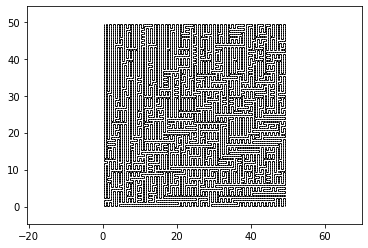

In [7]:
show_trees([],[], peano_curve_segments)

In [8]:
a = [1,2,3,5,6]
a.insert(-1,10)
print(a)


[1, 2, 3, 5, 10, 6]
